# Jillian Arthur: 10/1/24: Spotify API Data Report
#### Hypothosis: Songs that are more popular have more danceability. In theory this makes sense because songs that have upbeat melodies are generally catchy and circulate well on social media because of this. This could be determined by comparing the most popular songs as well as the most danceable songs and seeing if they are the same.
#### I will be using the endpoints for the 1989 album by Taylor Swift, and Ultraviolence by Lana Del Rey. Both of these albums came out in 2014. I will make scatter plots for each album showing the danceability and popularity of the songs on each album, and see if there is a visible correlation between the two from the graphs. 
#### The data telling us the popularity of an album is reliable as those are straight statistics based on how many streams it gets, however the data that states the danceability could be unreliable as 'danceability' is relatively subjective. Danceability can be defined as songs that are suitable to dance to, however one could argue that any song can be danced to, and some are more so than others depending on the person and their music taste. 

In [26]:
import urllib
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt

In [27]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data, headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [28]:
keys = pd.read_csv("keys.txt")

In [29]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [30]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'
audio_features = 'https://api.spotify.com/v1/albums/{}/tracks'

In [31]:
def api_call(endpoint_url, api_header):
      response = requests.get(endpoint_url, headers = api_header)
      print(response.status_code)
      return response.json()

In [32]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [33]:
ts_album_id = '2QJmrSgbdM35R67eoGQo4j'
ldr_album_id = '1ORxRsK3MrSLvh7VQTF01F'
west_coast_id = '5Y6nVaayzitvsD5F7nr3DV'

In [34]:
ab_tracks_ep.format(ldr_album_id)

'https://api.spotify.com/v1/albums/1ORxRsK3MrSLvh7VQTF01F/tracks'

In [35]:
ab_tracks_ep.format(west_coast_id)

'https://api.spotify.com/v1/albums/5Y6nVaayzitvsD5F7nr3DV/tracks'

In [36]:
ldr_album_response = api_call(ab_tracks_ep.format(ldr_album_id), session_header)
ts_album_response = api_call(ab_tracks_ep.format(ts_album_id), session_header)

200
200


In [37]:
ldr_album_df = pd.DataFrame(ldr_album_response['items'])
ts_album_df = pd.DataFrame(ts_album_response['items'])


In [38]:
ldr_track_ids = ','.join(ldr_album_df['id'].to_list())
ts_track_ids = ','.join(ts_album_df['id'].to_list())

In [39]:
t_features_ep + '?ids={}'.format(ldr_track_ids)

'https://api.spotify.com/v1/audio-features?ids=6ayKgleoMF26lvU1Z7wVm7,1y3r6RXiJZNBV1EI0NggpS,4VSg5K1hnbmIg4PwRdY6wV,1NZs6n6hl8UuMaX0UC0YTz,5Y6nVaayzitvsD5F7nr3DV,11MyiSGZSYSmhhqwGUTtAq,6PnluwP0fjGnpIBsqTdUTq,7Ms58r8G6Y0r1XLtpwoGxN,70Laus6ozJIHDpfTtUSmAZ,6IfPyMb0Sxptpx6jBUATOS,1KuVEZR4xuQVNr1KkanAV4,63hHlajVLQnlFMAqSyePxO,0vfPEfQk0ZCHExTZ007Ryr,0iQPnK3bi7O27c5T2HBTdr'

In [40]:
ldr_track_features = api_call(t_features_ep + '?market=US&ids={}'.format(ldr_track_ids), session_header)
ts_track_features = api_call(t_features_ep + '?market=US&ids={}'.format(ts_track_ids), session_header)

200
200


In [41]:
ldr_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(ldr_track_ids), session_header)
ts_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(ts_track_ids), session_header)

200
200


In [42]:
ldr_features_df = pd.DataFrame(ldr_track_features['audio_features'])
ts_features_df = pd.DataFrame(ts_track_features['audio_features'])

In [43]:
ldr_tracks_df = pd.DataFrame(ldr_track_info['tracks'])
ts_tracks_df = pd.DataFrame(ts_track_info['tracks'])
ldr_tracks_df[['name', 'popularity']]

,name,popularity
0,Cruel World,61
1,Ultraviolence,75
2,Shades Of Cool,66
3,Brooklyn Baby,80
4,West Coast,81
5,Sad Girl,76
6,Pretty When You Cry,74
7,Money Power Glory,63
8,Fucked My Way Up To The Top,62
9,Old Money,66


#### This data frame shows the name of the track and the popularity of each track on Ultraviolence. For all of the graphs, the higher the number, the higher the popularity. 

In [44]:
ldr_merged = pd.merge(ldr_features_df, ldr_tracks_df, how = 'inner', on = 'id')
ldr_merged[['name', 'danceability']]

,name,danceability
0,Cruel World,0.330
1,Ultraviolence,0.144
2,Shades Of Cool,0.262
3,Brooklyn Baby,0.404
4,West Coast,0.527
5,Sad Girl,0.345
6,Pretty When You Cry,0.509
7,Money Power Glory,0.349
8,Fucked My Way Up To The Top,0.520
9,Old Money,0.312


#### This data frame shows the name of each track and the danceability of each track on Ultraviolence. Now I will analyze these for 1989.

In [45]:
ts_merged = pd.merge(ts_features_df, ts_features_df, how = 'inner', on = 'id')

In [46]:
artist_compare = pd.concat([ldr_merged, ts_merged], axis = 0)
artist_compare
ts_tracks_df[['name', 'popularity']]

,name,popularity
0,Welcome To New York,52
1,Blank Space,69
2,Style,66
3,Out Of The Woods,52
4,All You Had To Do Was Stay,48
5,Shake It Off,68
6,I Wish You Would,40
7,Bad Blood,60
8,Wildest Dreams,64
9,How You Get The Girl,41


#### This data frame shows the name and popularity of each track on 1989. I will now analyze the danceability for this album.

In [47]:
ts_merged = pd.merge(ts_features_df, ts_tracks_df, how = 'inner', on = 'id')
ts_merged[['name', 'danceability']]

,name,danceability
0,Welcome To New York,0.793
1,Blank Space,0.753
2,Style,0.598
3,Out Of The Woods,0.552
4,All You Had To Do Was Stay,0.602
5,Shake It Off,0.647
6,I Wish You Would,0.648
7,Bad Blood,0.650
8,Wildest Dreams,0.554
9,How You Get The Girl,0.764


#### This data frame shows the name and danceability of each track on 1989. 

#### This data does have limitations. For example, as mentioned previously, danceability is subjective. Danceability could be defined as a song that one can easily dance to, however this definition is a bit incomplete and does not have clear criteria. Also, the popularity of songs changes over time, as more and more people listen to them. This data is as up to date as when it was downloaded, so it may have changed since then. Next steps with this data may be to explore why it is that there is a coorelation between danceability and popularity, and what that says about society's general music taste. Another approach for this task may be exploring other traits of songs such as loudness, or energy, as these have similar themes to danceability. 

#### I am going to now see if there appears to be a correlation between danceability and popularity for either of these albums. I will make a scatter plot of each one and see if there appears to be a trend. The graph for 1989 is on the left, and Ultraviolence is on the right.

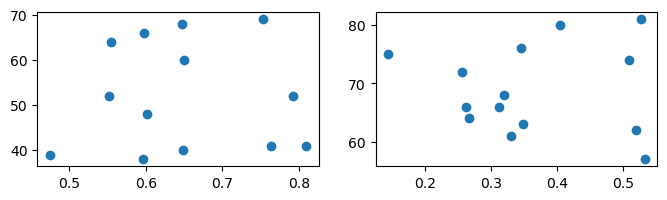

In [53]:
fig2, ax2 = plt.subplots(1, 2, figsize = (8, 2))
ax2[0].scatter(ts_merged['danceability'], ts_merged['popularity'])
ax2[1].scatter(ldr_merged['danceability'], ldr_merged['popularity'])
plt.show()

#### The data in these scatter plots does not highlight a clear trend between danceability and popularity for either of these albums. If they did, the data would generally follow a straight diagonal line going up and to the right. 